# Example of correction for SWS for DAS event

Prepare inputs and python module imports

In [1]:
# Import neccessary modules:
%load_ext autoreload
%autoreload 2
import sys,os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
# Import modules for downloading synthetic model data:
import gdown
# Modules from TomSHudson github:
import SeisSrcInv


## 0. Download snythetic model data (generated using fk)

In [2]:
# NOT NEEDED CURRENTLY, AS CURRENTLY EXPORT WITH ALL THE DATA

# Download fk synthetic data for example from google drive:
# (~ 200 mb)
# synth_gd_fnames_and_urls = np.loadtxt(os.path.join("inputs", "gdown_lnk_list_fk_greens_funcs_and_real_data"), dtype=str)
# for i in range(len(synth_gd_fnames_and_urls[:,0])):
#     url = synth_gd_fnames_and_urls[i,1]
#     output = os.path.join("inputs","fk_greens_funcs_and_real_data",synth_gd_fnames_and_urls[i,0])
#     gdown.download(url, output, quiet=True)
# print("Finished downloading fk synthetic data")


## 1. Run small inversion:

Note that we only run for 1000 samples here, just to show the inversion working.

In [3]:
preform_inv = True

# Define paramters for performing actual inversion:
# Don't change parameters unless confident of what they do! See function help (help(SeisSrcInv.inversion.run())) for further parameter details.
datadir = os.path.join("inputs", "fk_greens_funcs_and_real_data")
nlloc_hyp_fname = os.path.join("inputs", 'loc.Tom__RunNLLoc000.20200114.040143.grid0.loc.hyp.all_das_artificial') # Note: This file has manually calculated phase azis and toas for all DAS fibre locations
outdir = os.path.join('outputs', 'FW_data_out')
real_data_fnames = [] # List of real waveform data files within datadir corresponding to each station (i.e. length is number of stations to invert for)
MT_green_func_fnames = [] # List of Green's functions data files (generated using fk code) within datadir corresponding to each station (i.e. length is number of stations to invert for)
for i in range(0,960,10):
    real_data_fnames.append('real_data_D'+str(i).zfill(4)+'_das_axis.txt')
    MT_green_func_fnames.append('green_func_array_MT_D'+str(i).zfill(4)+'_das_axis.txt')
single_force_green_func_fnames = [] # List of Green's functions data files (generated using fk code) within datadir corresponding to each station (i.e. length is number of stations to invert for)
data_labels = [] # Format of these labels must be of the form "station_name, comp" with the comma
for i in range(0,960,10):
    data_labels.append(''.join(('D', str(i).zfill(4), ', T')))
inversion_type = 'DC' # Inversion type automatically filled (if single force, greens functions must be 3 components rather than 6) (Options are: "DC", "single_force", "full_mt", "full_mt_Lune_samp", "DC_single_force_couple", "DC_single_force_no_coupling", "DC_crack_couple", "single_force_crack_no_coupling"]: #["full_mt", "DC", "single_force", "DC_single_force_couple", "DC_single_force_no_coupling", "DC_crack_couple", "single_force_crack_no_coupling")
perform_normallised_waveform_inversion = True 
num_samples = 1000 # Number of samples to perform Monte Carlo over (typically might want to use 10e6 for a DC inversion)
comparison_metric = "VR"
# manual_indices_time_shift_MT = [0, 0, 0, 0, 0, 0, 0] # Don't need t specify if auto_shift_for_best_fit==True
# manual_indices_time_shift_SF = [0, 0, 0, 0, 0, 0, 0] # Don't need t specify if auto_shift_for_best_fit==True
auto_shift_for_best_fit = True #True # If True, performs automatic shift for fit of observational data to model. Therefore, if this is specified, one does not need to align the real and modelled data before inputing. (Default is True) (bool)
cut_phase_start_vals = 600*np.ones(len(MT_green_func_fnames)) #500*np.ones(len(MT_green_func_fnames)) # The indices of the start of the phase windows in samples
cut_phase_length = 200
num_processors = 10 # Number of processors to run for (default is 1)
set_pre_time_shift_values_to_zero_switch = False # If True, sets values before time shift to zero (default is True)
return_absolute_similarity_values_switch = True # If True, will also save absolute similarity values, as well as the normallised values.
# For other options, see help(SeisSrcInv.inversion.run())

In [4]:
# Perform inversion:
if preform_inv:
    print("----------------------- Performing source mechanism inversion -----------------------")
    # Perform the inversion:
    SeisSrcInv.inversion.run(datadir, outdir, real_data_fnames, MT_green_func_fnames, single_force_green_func_fnames, data_labels, inversion_type, num_samples, comparison_metric, nlloc_hyp_fname, perform_normallised_waveform_inversion=perform_normallised_waveform_inversion, cut_phase_start_vals=cut_phase_start_vals, cut_phase_length=cut_phase_length, num_processors=num_processors, set_pre_time_shift_values_to_zero_switch=set_pre_time_shift_values_to_zero_switch, return_absolute_similarity_values_switch=return_absolute_similarity_values_switch, auto_shift_for_best_fit=auto_shift_for_best_fit)
    print("----------------------- Finsihed performing source mechanism inversion -----------------------")

----------------------- Performing source mechanism inversion -----------------------


/Users/eart0504/Documents/python/github_repositories/SeisSrcInv/SeisSrcInv/inversion.py:276: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  M, res, rank, sing_values_G = np.linalg.lstsq(G,D) # Equivilent to M = G\D; for G not square. If G is square, use linalg.solve(G,D)


Saving FW inversion to file: outputs/FW_data_out/least_squares_result/20200114040142400428_FW_DC.pkl
Saving FW inversion to file: outputs/FW_data_out/least_squares_result/20200114040142400428_FW_DC.wfs
Processing for process:Processing for process: 0 1 Processing for process:for   Processing for process: 2for 100   3 100Processing for process:for samples.   
 4for samples. 100 
for Processing for process:  100  samples.1005samples. 
Processing for process:
 samples. for 
6  for Processing for process:100   100samples.7
 Processing for process: samples.for  
8 100  for samples. Processing for process:
100  samples.9
 for  100 samples.
Processor number: 0Processor number:  - Processed for1  0- Processed forProcessor number:   samples out of0Processor number:2   Processor number: 1003samples out of - Processed for   - Processed for4samples 100 0 
 - Processed for 0samples samples out of 
0samples out ofProcessor number:    100100samples out ofProcessor number:5     samplessamples1006- Pro

Plotting data for inversion
Processing data for: outputs/FW_data_out/20200114040142400428_FW_DC.pkl
Sampled 1000 out of 1000 events


<IPython.core.display.Javascript object>


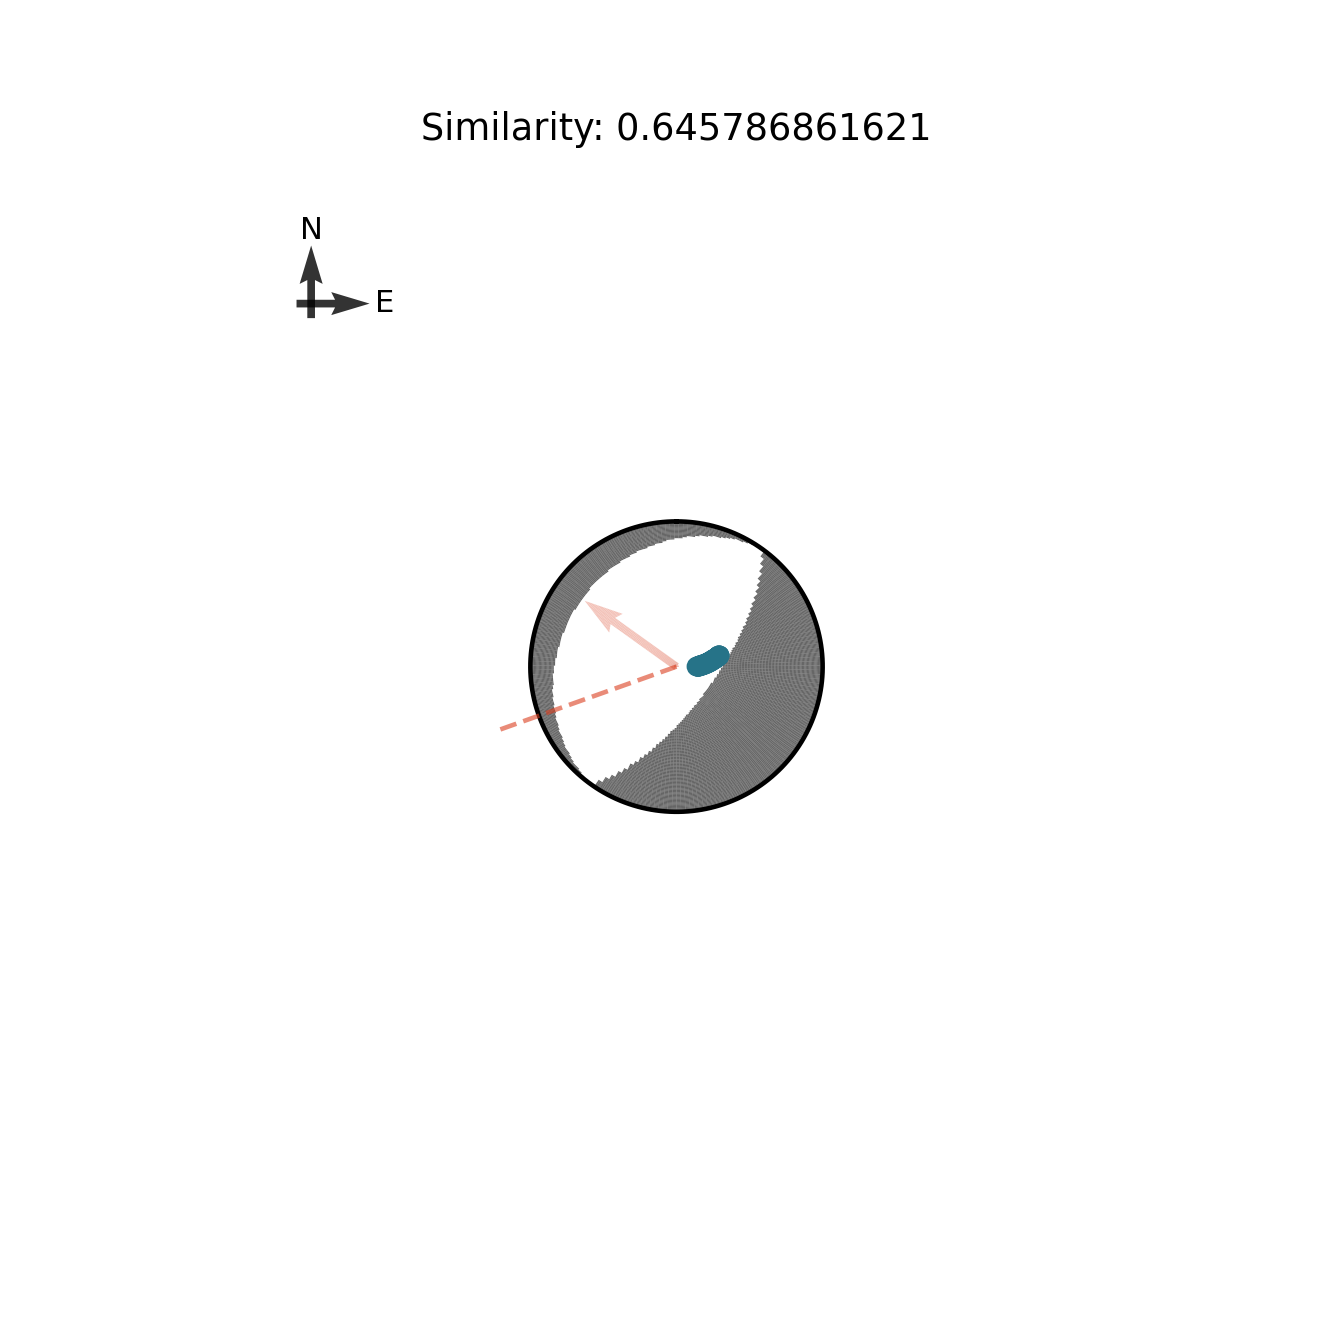

(Skipping current nodal plane solution as can't plot.)


/Users/eart0504/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


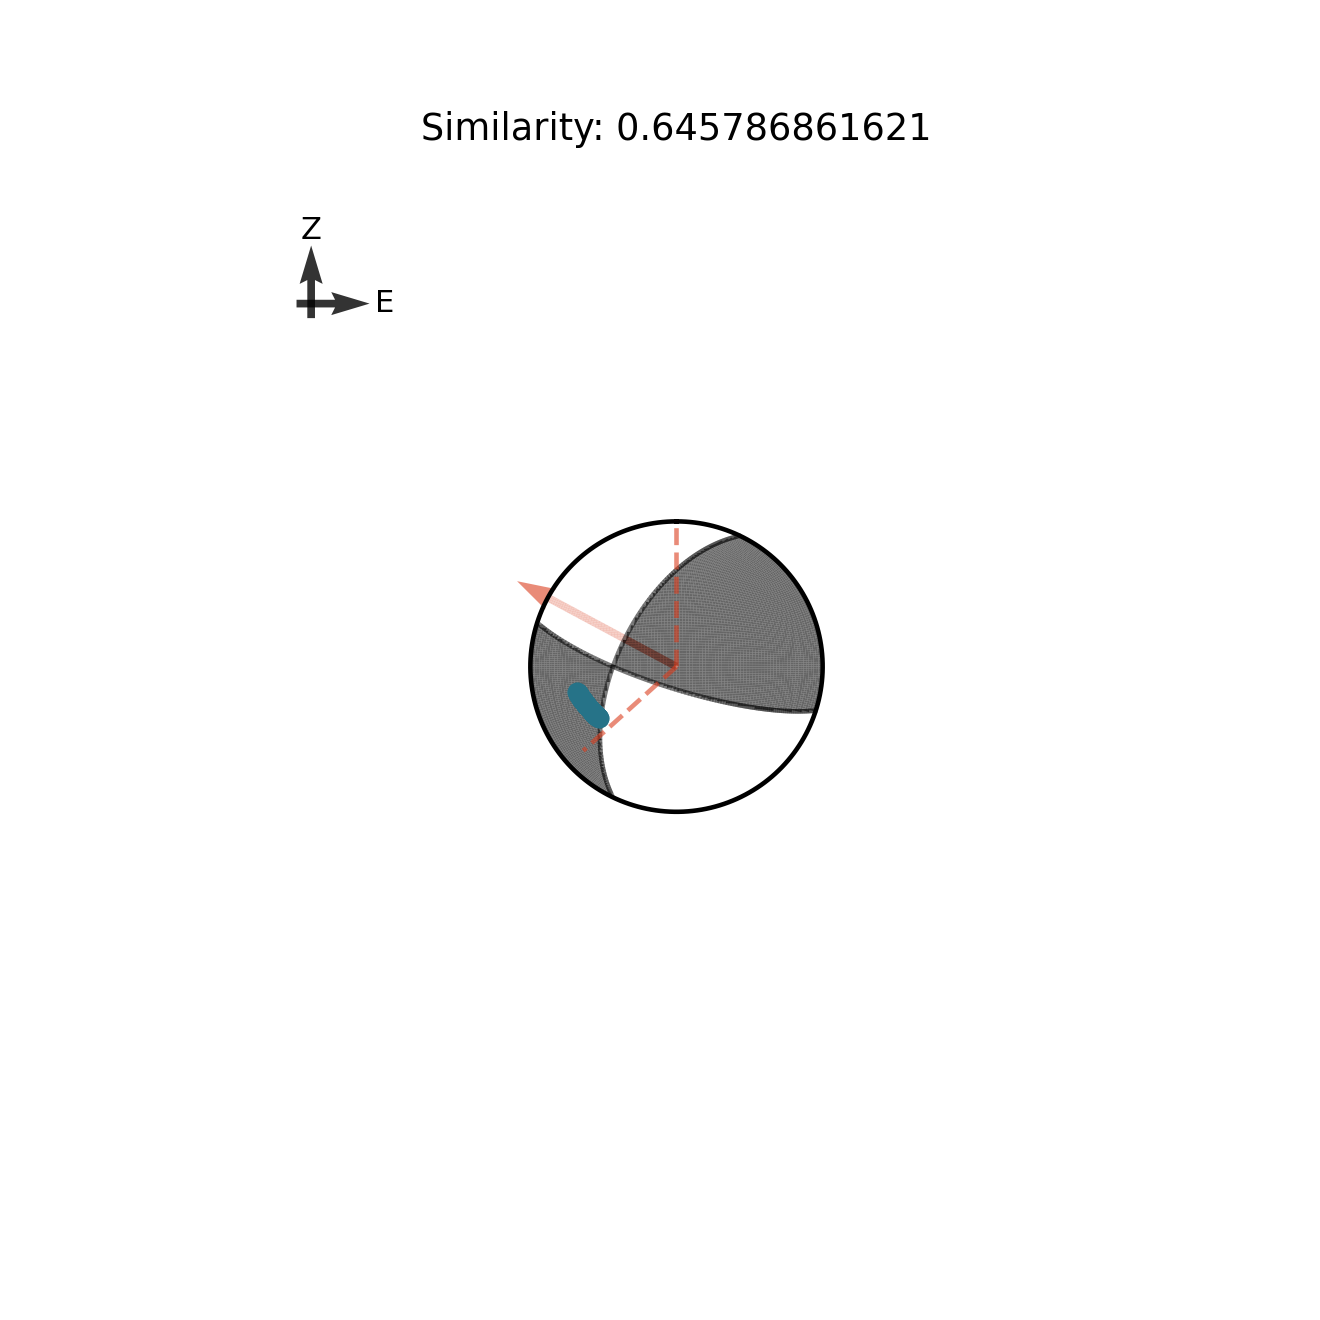

/Users/eart0504/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


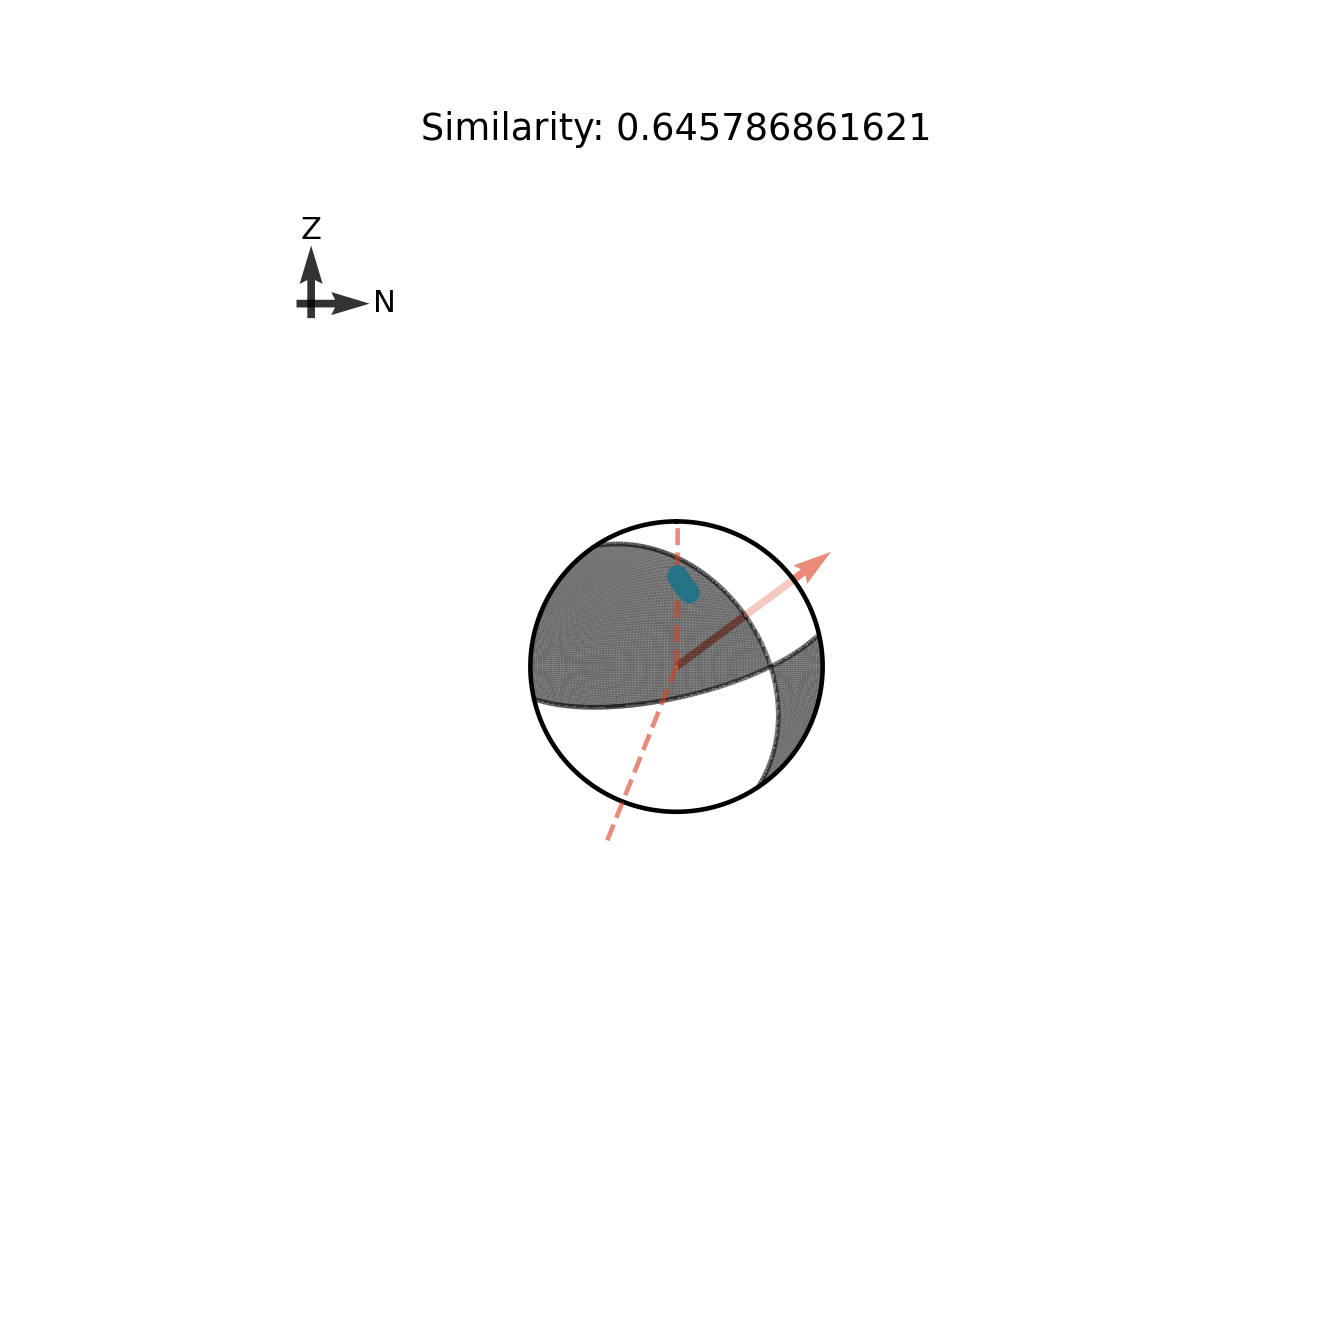

/Users/eart0504/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


['D0000, T', 'D0010, T', 'D0020, T', 'D0030, T', 'D0040, T', 'D0050, T', 'D0060, T', 'D0070, T', 'D0080, T', 'D0090, T', 'D0100, T', 'D0110, T', 'D0120, T', 'D0130, T', 'D0140, T', 'D0150, T', 'D0160, T', 'D0170, T', 'D0180, T', 'D0190, T', 'D0200, T', 'D0210, T', 'D0220, T', 'D0230, T', 'D0240, T', 'D0250, T', 'D0260, T', 'D0270, T', 'D0280, T', 'D0290, T', 'D0300, T', 'D0310, T', 'D0320, T', 'D0330, T', 'D0340, T', 'D0350, T', 'D0360, T', 'D0370, T', 'D0380, T', 'D0390, T', 'D0400, T', 'D0410, T', 'D0420, T', 'D0430, T', 'D0440, T', 'D0450, T', 'D0460, T', 'D0470, T', 'D0480, T', 'D0490, T', 'D0500, T', 'D0510, T', 'D0520, T', 'D0530, T', 'D0540, T', 'D0550, T', 'D0560, T', 'D0570, T', 'D0580, T', 'D0590, T', 'D0600, T', 'D0610, T', 'D0620, T', 'D0630, T', 'D0640, T', 'D0650, T', 'D0660, T', 'D0670, T', 'D0680, T', 'D0690, T', 'D0700, T', 'D0710, T', 'D0720, T', 'D0730, T', 'D0740, T', 'D0750, T', 'D0760, T', 'D0770, T', 'D0780, T', 'D0790, T', 'D0800, T', 'D0810, T', 'D0820, T', 'D0

<IPython.core.display.Javascript object>


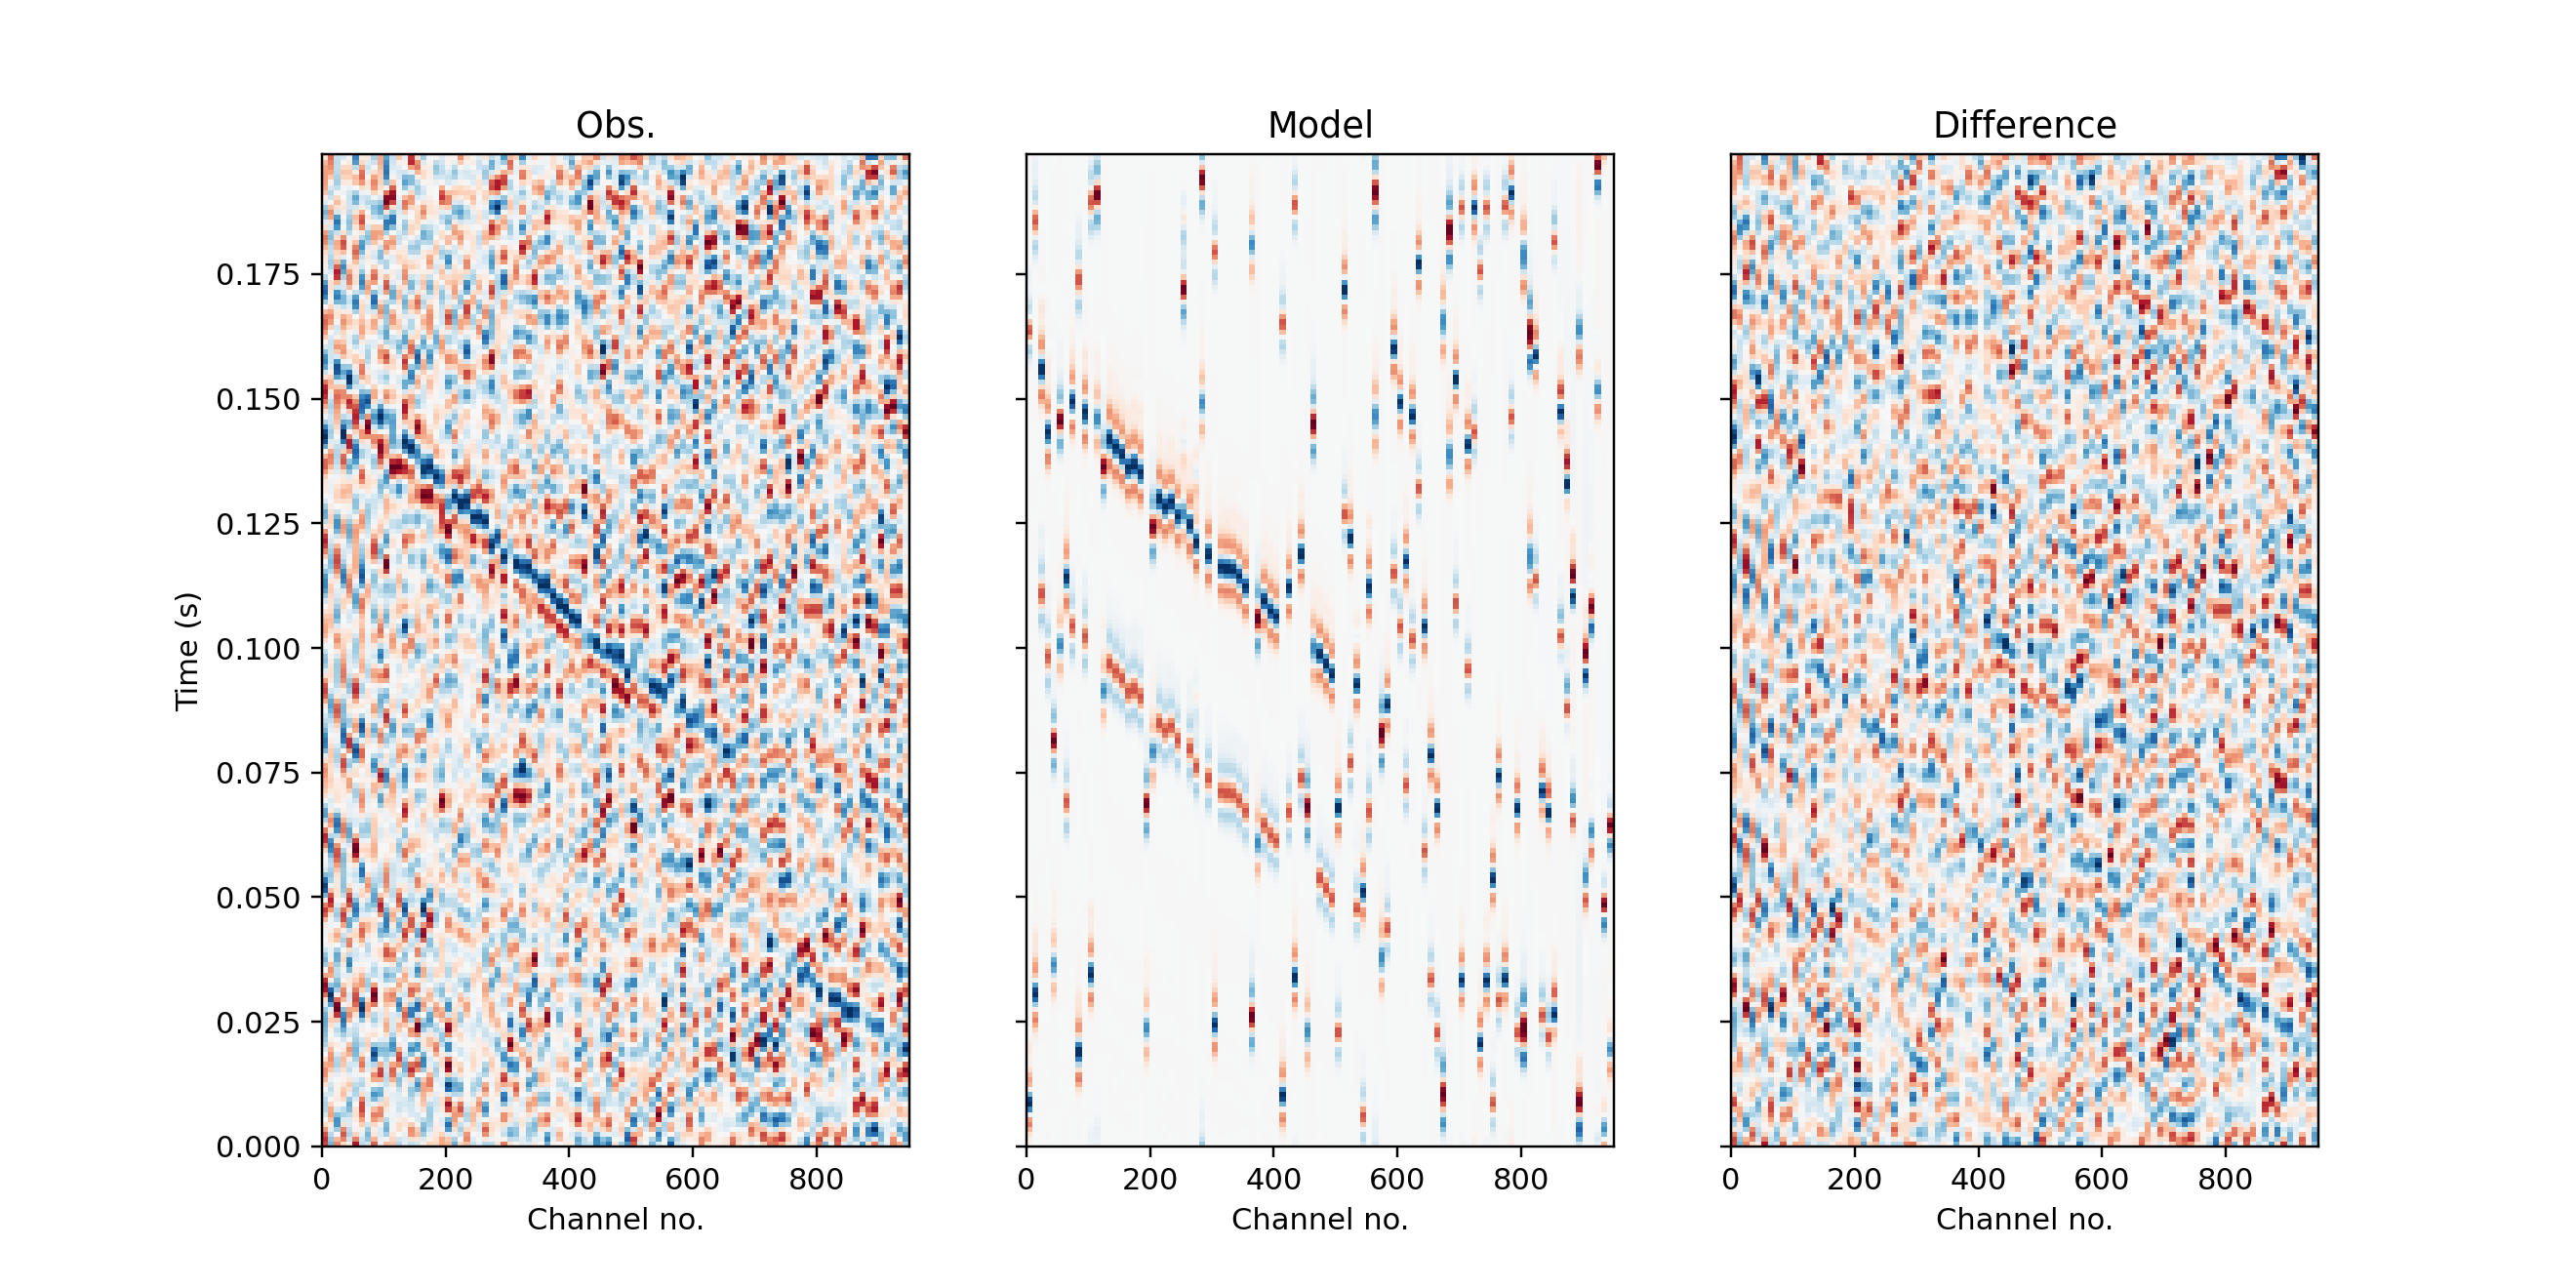

/Users/eart0504/Documents/python/github_repositories/SeisSrcInv/SeisSrcInv/plot.py:1465: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[0].pcolormesh(X, T, real_wfs, cmap='RdBu', vmin=-max_amp, vmax=max_amp)
/Users/eart0504/Documents/python/github_repositories/SeisSrcInv/SeisSrcInv/plot.py:1466: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[1].pcolormesh(X, T, synth_wfs, cmap='RdBu', vmin=-max_amp, vmax=max_amp)
/Users/eart0504/Documents/python/gith

Full MT (max prob.):
[[  1.65402938e+11  -2.29348697e+11   3.05859336e+11]
 [ -2.29348697e+11   3.18016267e+11  -4.24106373e+11]
 [  3.05859336e+11  -4.24106373e+11  -4.83419205e+11]]
(For plotting radiation pattern)
Finished processing unconstrained inversion data for: outputs/FW_data_out/20200114040142400428_FW_DC.pkl
Finished


In [5]:
# Plot results:
# Define plotting parameters:
inversion_output_data_dir = outdir
plot_outdir = os.path.join('outputs','FW_data_out','plots')
event_uid = "20200114040142400428"
plot_wfs_on_focal_mech_switch= False
plot_uncertainty_switch = True
# DAS specific plotting parameters:
plot_das_wfs_switch=True
fs_das=1000.
SeisSrcInv.plot.run(inversion_type, event_uid, inversion_output_data_dir, plot_outdir=plot_outdir, plot_wfs_on_focal_mech_switch=plot_wfs_on_focal_mech_switch, plot_uncertainty_switch=plot_uncertainty_switch, plot_das_wfs_switch=plot_das_wfs_switch, fs_das=fs_das)
